# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 4
*gelöst von Stollmayer Max*

### Aufgabe 1

to do

(Zusatzaufgabe)

### Aufgabe 2

Zu implementieren ist das Mehrschrittverfahren nach Adams-Bashforth. Dabei sind die drei zusätzlichen Startwerte mittels Vorwärts-Euler, Runge-Kutta-4 und der exakten Lösung zu bestimmen und deren Performance zu vergleichen.

#### Definitions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [12.8, 7.2]

In [2]:
def forward_euler(f, y0, t):
    '''
    Returns list of function values approximated with the forward Euler method.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value
    t .... grid of input values
    '''
    
    N = len(t)
    h = (t[-1] - t[0]) / N

    if isinstance(y0, (int, float)):
        y = np.zeros(N)
    else:
        y = np.zeros((N, np.size(y0)))
    y[0] = y0

    for n in range(0, N-1):
        y[n+1] = y[n] + h * f(y[n], t[n])

    return y

In [3]:
def rk4(f, y0, t):
    '''
    Returns list of function values approximated with the Runge-Kutta method of 4th order.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value
    t .... grid of input values
    '''
    
    N = len(t)
    h = (t[-1] - t[0]) / N
    
    if isinstance(y0, (int, float)):
        y = np.zeros(N)
    else:
        y = np.zeros((N, np.size(y0)))
    y[0] = y0
    
    for n in range(0, N-1):
        k1 = f(y[n], t[n])
        k2 = f(y[n] + h/2 * k1, t[n] + h/2)
        k3 = f(y[n] + h/2 * k1, t[n] + h/2)
        k4 = f(y[n] + h/2 * k1, t[n] + h/2)
        y[n+1] = y[n] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return y

In [4]:
def adams_bashforth(f, vals, t):
    '''
    Returns list of function values approximated with the Adams-Bashforth method.

    f ...... function of ODE y' = f(y, t)
    vals ... initial values (y0, y1, y2, y3)
    t ...... grid of input values
    '''
    
    N = len(t)
    h = (t[-1] - t[0]) / N
    
    if isinstance(vals[0], (int, float)):
        y = np.zeros(N)
    else:
        y = np.zeros((N, np.size(vals[0])))
        
    for i in range(0,4):
        y[i] = vals[i]
    
    for n in range(0, N-4):
        y[n+4] = y[n+3] + h/24 * (55*f(y[n+3], t[n+3]) - 59*f(y[n+2], t[n+2]) + 37*f(y[n+1], t[n+1]) - 9*f(y[n], t[n]))
        
    return y

#### Test
$y'(t) = -2\ t\ y(t)^2, \quad y(0) = 1$

In [5]:
def f(y, t):
    return -2 * t * y**2

def exact(t):
    return 1/(t**2 + 1)

def error(y):
    return np.abs(y - exact(1))

def conv(errors, hs):
    roc = np.zeros(len(errors)-1)
    for i in range(0, len(errors)-1):
        roc[i] = np.abs(errors[i+1] - errors[i]) / np.abs(hs[i+1] - hs[i])
    return roc

In [6]:
steps = (10, 20, 40, 80, 160, 320)
e1 = ()
e2 = ()
e3 = ()
for N in steps:
    t = np.arange(N+1) / N
    
    vals1 = np.array([exact(t[i]) for i in range(0, 4)])
    y1 = adams_bashforth(f, vals1, t)
    e1 += (error(y1[-1]),)
    
    vals2 = rk4(f, 1, t)[0:4].flatten()
    y2 = adams_bashforth(f, vals2, t)
    e2 += (error(y2[-1]),)
    
    vals3 = forward_euler(f, 1, t)[0:4].flatten()
    y3 = adams_bashforth(f, vals3, t)
    e3 += (error(y3[-1]),)

In [7]:
hs = [1/N for N in steps]
c1 = conv(e1, hs)
c2 = conv(e2, hs)
c3 = conv(e3, hs)

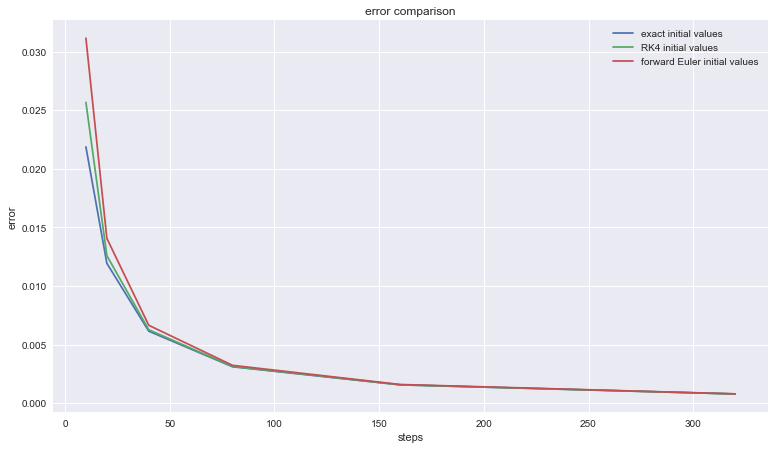

In [8]:
plt.plot(steps, e1, label="exact initial values")
plt.plot(steps, e2, label="RK4 initial values")
plt.plot(steps, e3, label="forward Euler initial values")
plt.title("error comparison")
plt.xlabel("steps")
plt.ylabel("error")
plt.legend()
plt.show()

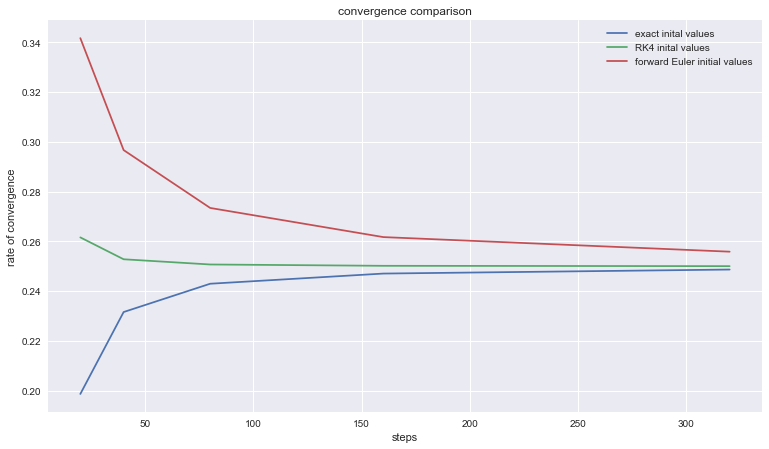

In [9]:
plt.plot(steps[1:], c1, label="exact inital values")
plt.plot(steps[1:], c2, label="RK4 inital values")
plt.plot(steps[1:], c3, label="forward Euler initial values")
plt.title("convergence comparison")
plt.xlabel("steps")
plt.ylabel("rate of convergence")
plt.legend()
plt.show()

In [4]:
import numpy as np
isinstance(np.array([1,2]), np.ndarray)

True